In [2]:
import os
import nltk

# Set NLTK_DATA environment variable if not already set
if not os.environ.get('NLTK_DATA'):
    os.environ['NLTK_DATA'] = r'C:\Users\Angelika Vergara\AppData\Roaming\nltk_data' # Use raw string

# Add NLTK data path to nltk.data.path
nltk.data.path.append(os.environ['NLTK_DATA'])

try:
    nltk.data.find("averaged_perceptron_tagger")
    print("NLTK data found!")
except LookupError:
    print("NLTK data not found. Check your NLTK_DATA environment variable or download location.")

NLTK data not found. Check your NLTK_DATA environment variable or download location.


In [12]:
%pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install onnx2tf tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install onnx onnx2tf torch onnxruntime tensorflow

   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   -----------------

In [2]:
%pip install onnx-graphsurgeon

In [3]:
%pip install --upgrade pip setuptools wheel

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ----------------------

In [6]:
%pip install nvidia-tensorrt


  Using cached nvidia-tensorrt-0.0.1.dev5.tar.gz (7.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Angelika Vergara\AppData\Local\Temp\pip-install-4jm943n6\nvidia-tensorrt_6725601220494a08907e3fbfd4513f07\setup.py", line 150, in <module>
          raise RuntimeError(open("ERROR.txt", "r").read())
      RuntimeError:
      ###########################################################################################
      The package you are trying to install is only a placeholder project on PyPI.org repository.
      This package is hosted on NVIDIA Python Package Index.
      
      This package can be installed as:
      ```
      $ pip install nvidia-pyindex
      $ pip install nvidia-tensorrt
      ```
      ######################################################################

Using device: cuda


c:\Users\Angelika Vergara\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn(
c:\Users\Angelika Vergara\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1, Loss: 0.1993
Epoch 1, Val Accuracy: 0.9453
Epoch 2, Loss: 0.1405
Epoch 2, Val Accuracy: 0.9486
Epoch 3, Loss: 0.1267
Epoch 3, Val Accuracy: 0.9521
Epoch 4, Loss: 0.1175
Epoch 4, Val Accuracy: 0.9535
Epoch 5, Loss: 0.1090
Epoch 5, Val Accuracy: 0.9546
Epoch 6, Loss: 0.1007
Epoch 6, Val Accuracy: 0.9519
Early stopping counter: 1
Epoch 7, Loss: 0.0944
Epoch 7, Val Accuracy: 0.9539
Early stopping counter: 2
Epoch 8, Loss: 0.0864
Epoch 8, Val Accuracy: 0.9539
Early stopping counter: 3
Early stopping triggered
Early stopping at epoch 8
Average forward pass time: 0.0130 seconds

Final Validation Metrics (on best model):
Accuracy: 0.9539
Precision: 0.9471
Recall: 0.9615
F1-score: 0.9543

Classification Report (on best model):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6000
           1       0.95      0.96      0.95      6000

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95  

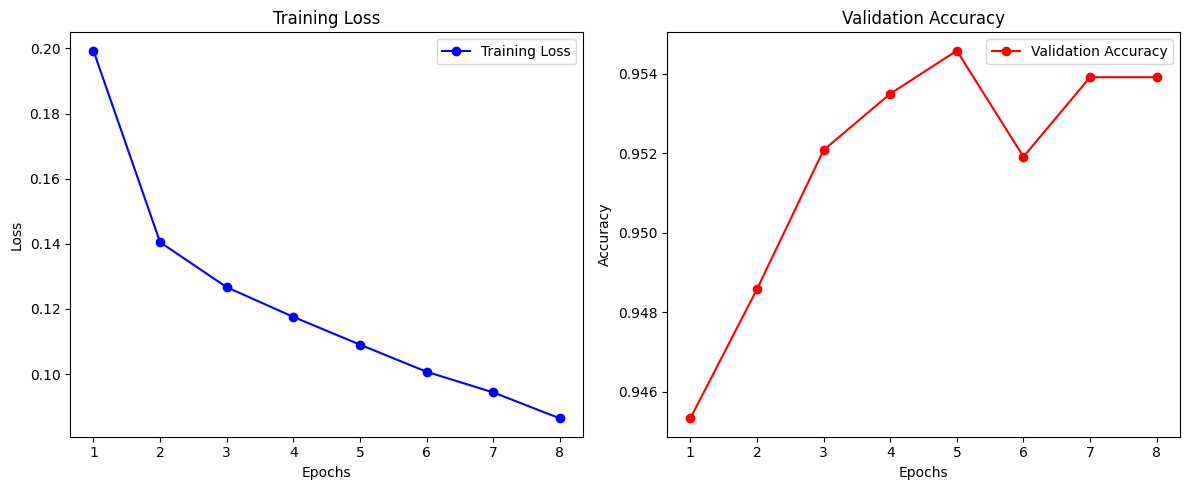

In [2]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.utils import class_weight

# Configuration
CONFIG = {
    "max_len": 256,
    "batch_size": 128,
    "lstm_hidden_dim": 384,
    "num_lstm_layers": 2,
    "dropout_rate": 0.4,  # Increased dropout rate
    "learning_rate": 1e-5,
    "weight_decay": 0.01,
    "patience": 3,  # Reduced patience
    "min_delta": 0.0005,
    "num_epochs": 10,
    "gradient_accumulation_steps": 2,
}

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the datasets
try:
    train_df = pd.read_csv("train.csv")
    test_df = pd.read_csv("test.csv")
except FileNotFoundError:
    print("Error: train.csv or test_df.csv not found.")
    exit()

# Preprocessing (minimal)
try:
    train_df['label'] = train_df['label'].astype(int)
    test_df['label'] = test_df['label'].astype(int)
except ValueError as e:
    print(f"Could not convert labels to numeric: {e}")
    exit()

train_df = train_df[['text', 'label']].dropna()
test_df = test_df[['text', 'label']].dropna()

identity_terms = ["muslim", "black", "women", "democrat", "hispanics", "latinos"]
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = 128
# No need for custom word_to_index dictionary with BERT

def pad_sequence(sequence, max_length, pad_token_id):
    return sequence + [pad_token_id] * (max_length - len(sequence))

class ToxicCommentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len, identity_terms):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.identity_terms = identity_terms

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        subjectivity_score = TextBlob(text).sentiment.subjectivity
        identity_term_present = 1 if any(term in text.lower() for term in self.identity_terms) else 0

        # Use BERT tokenizer directly
        encoded_text = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids = encoded_text['input_ids'].flatten()
        attention_mask = encoded_text['attention_mask'].flatten()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'subjectivity_score': torch.tensor(subjectivity_score, dtype=torch.float),
            'identity_term_present': torch.tensor(identity_term_present, dtype=torch.float),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Data preparation
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df['text'].tolist(),
    train_df['label'].tolist(),
    test_size=0.1,
    random_state=42,
    stratify=train_df['label']
)

train_dataset = ToxicCommentDataset(train_texts, train_labels, tokenizer, max_len, identity_terms)
val_dataset = ToxicCommentDataset(val_texts, val_labels, tokenizer, max_len, identity_terms)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Model with BERT and Attention Mechanism
class HybridModel(nn.Module):
    def __init__(self, lstm_hidden_dim=256, num_lstm_layers=1, dropout_rate=0.4):  # Increased dropout
        super(HybridModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        # Unfreeze the last two layers of BERT - KEY IMPROVEMENT
        for name, param in self.bert.named_parameters():
            if 'encoder.layer.11' in name or 'encoder.layer.10' in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
        self.lstm = nn.LSTM(self.bert.config.hidden_size, lstm_hidden_dim, num_layers=num_lstm_layers,
                            batch_first=True, bidirectional=True, dropout=dropout_rate)
        self.dropout = nn.Dropout(dropout_rate)
        self.attention_layer = nn.Linear(lstm_hidden_dim * 2, 1)
        self.classifier = nn.Linear(lstm_hidden_dim * 2 + 2, 2)

    def forward(self, input_ids, attention_mask=None,
                subjectivity_score=None,
                identity_term_present=None):

        bert_output = self.bert(input_ids, attention_mask=attention_mask)
        lstm_input = bert_output.last_hidden_state  # Use the last hidden state as input to LSTM

        lstm_out, _ = self.lstm(lstm_input)

        attention_weights = torch.softmax(self.attention_layer(lstm_out).squeeze(-1), dim=-1)
        attended_lstm = torch.sum(lstm_out * attention_weights.unsqueeze(-1), dim=1)

        pooled_output = self.dropout(attended_lstm)
        pooled_output = torch.cat((pooled_output, subjectivity_score.unsqueeze(1),
                                  identity_term_present.unsqueeze(1)), dim=1)
        return self.classifier(pooled_output)

# Early Stopping
class EarlyStopper:
    def __init__(self, patience=3, min_delta=0.0001):  # Reduced patience
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_accuracy = None
        self.early_stop = False

    def __call__(self, val_accuracy):
        if self.best_accuracy is None:
            self.best_accuracy = val_accuracy
        elif val_accuracy < self.best_accuracy + self.min_delta:
            self.counter += 1
            print(f"Early stopping counter: {self.counter}")
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_accuracy = val_accuracy
            self.counter = 0

# Time Complexity Measurement
def measure_model_time_complexity(model, input_shape, device):
    model.eval()  # Set the model to evaluation mode
    input_ids = torch.randint(1, 1000, input_shape).to(device)  # Generate random input
    attention_mask = torch.ones(input_shape, dtype=torch.long).to(device)
    subjectivity_score = torch.randn(input_shape[0]).to(device)
    identity_term_present = torch.randint(0, 2, (input_shape[0],)).float().to(device)

    start_time = time.time()
    with torch.no_grad():  # Disable gradient calculation
        model(input_ids, attention_mask=attention_mask, subjectivity_score=subjectivity_score,
              identity_term_present=identity_term_present)
    end_time = time.time()

    return end_time - start_time

# Calculate class weights BEFORE the training loop, using train_labels from the split
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Model and Optimizer
model = HybridModel().to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.AdamW(model.parameters(), lr=CONFIG["learning_rate"], weight_decay=CONFIG["weight_decay"])
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)  # Added scheduler
early_stopper = EarlyStopper(patience=CONFIG["patience"], min_delta=CONFIG["min_delta"])

# Training loop
train_losses = []
val_accuracies = []
best_model_state = None
best_accuracy = 0.0

for epoch in range(CONFIG["num_epochs"]):
    model.train()
    total_loss = 0
    for batch in train_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')

    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    val_accuracies.append(accuracy)
    print(f'Epoch {epoch+1}, Val Accuracy: {accuracy:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_state = model.state_dict()

    scheduler.step(accuracy)  # Scheduler step
    early_stopper(accuracy)
    if early_stopper.early_stop:
        print("Early stopping at epoch", epoch+1)
        break

# Measure model time complexity
input_shape = (64, max_len)  # Adjust batch size as needed
time_complexity = measure_model_time_complexity(model, input_shape, device)
print(f"Average forward pass time: {time_complexity:.4f} seconds")

# Final evaluation on best model state
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    print("\nFinal Validation Metrics (on best model):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report (on best model):")
    print(classification_report(all_labels, all_preds))

# Plotting
epochs_range = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, 'b-o', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

if val_loader:
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range[:len(val_accuracies)], val_accuracies, 'r-o', label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


In [6]:
import torch

# Save model state_dict (recommended approach)
torch.save(model.state_dict(), "proposed_balanced.pth")
print("PyTorch model saved successfully!")


PyTorch model saved successfully!


In [7]:
import torch
import torch.nn as nn

# Define the same model architecture before loading weights
class SentimentModel(nn.Module):
    def __init__(self):
        super(SentimentModel, self).__init__()
        self.lstm = nn.LSTM(input_size=300, hidden_size=128, batch_first=True)
        self.fc = nn.Linear(128, 3)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

# Initialize model
model = SentimentModel()

# Load saved weights
model.load_state_dict(torch.load("proposed_balanced.pth", map_location=torch.device("cpu")))

# Set to evaluation mode
model.eval()

print("PyTorch model loaded successfully!")


PyTorch model loaded successfully!


C:\Users\Angelika Vergara\AppData\Local\Temp\ipykernel_27076\166788700.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("proposed_balanc